<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211025_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-3

In [129]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2,random_state=42)

In [28]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [29]:
model = model_fn()

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [32]:
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


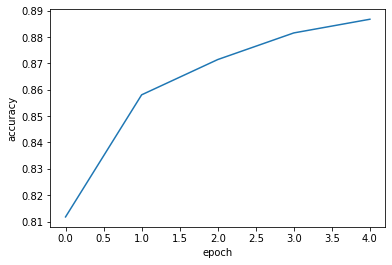

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

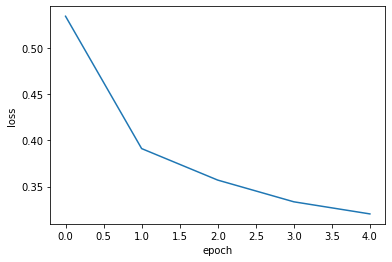

In [37]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [40]:
model= model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=25, verbose=0)

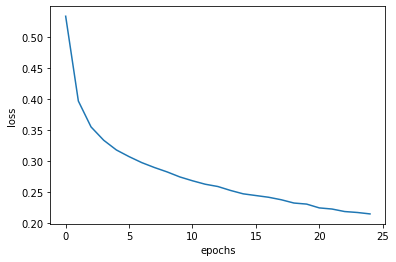

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

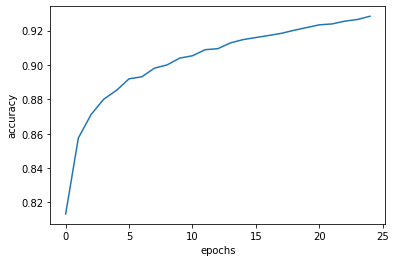

In [42]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [46]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=25, verbose=0,
          validation_data=(val_scaled, val_target))

In [47]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


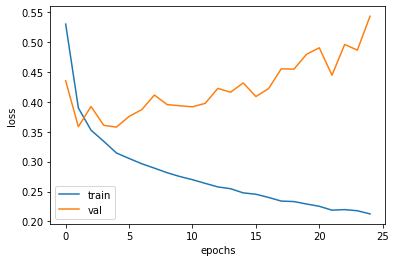

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

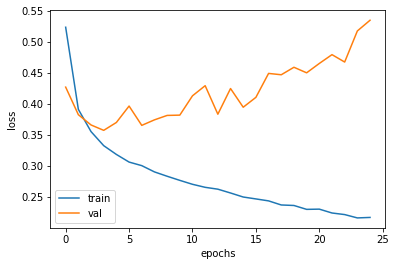

In [51]:
model=model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=25, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Epoch 1/25
1500/1500 - 3s - loss: 0.5267 - accuracy: 0.8160 - val_loss: 0.4313 - val_accuracy: 0.8470
Epoch 2/25
1500/1500 - 3s - loss: 0.3939 - accuracy: 0.8587 - val_loss: 0.4168 - val_accuracy: 0.8477
Epoch 3/25
1500/1500 - 3s - loss: 0.3518 - accuracy: 0.8736 - val_loss: 0.3650 - val_accuracy: 0.8698
Epoch 4/25
1500/1500 - 3s - loss: 0.3265 - accuracy: 0.8815 - val_loss: 0.3457 - val_accuracy: 0.8739
Epoch 5/25
1500/1500 - 3s - loss: 0.3062 - accuracy: 0.8873 - val_loss: 0.3400 - val_accuracy: 0.8758
Epoch 6/25
1500/1500 - 3s - loss: 0.2942 - accuracy: 0.8914 - val_loss: 0.3388 - val_accuracy: 0.8755
Epoch 7/25
1500/1500 - 3s - loss: 0.2810 - accuracy: 0.8951 - val_loss: 0.3290 - val_accuracy: 0.8785
Epoch 8/25
1500/1500 - 3s - loss: 0.2707 - accuracy: 0.8991 - val_loss: 0.3288 - val_accuracy: 0.8833
Epoch 9/25
1500/1500 - 3s - loss: 0.2584 - accuracy: 0.9049 - val_loss: 0.3349 - val_accuracy: 0.8807
Epoch 10/25
1500/1500 - 3s - loss: 0.2494 - accuracy: 0.9092 - val_loss: 0.3262 - 

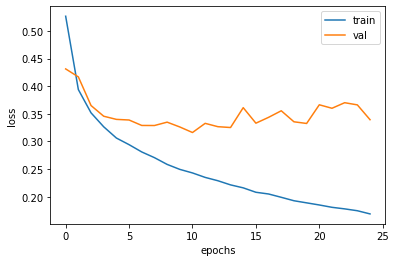

In [53]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=25, verbose=2,
          validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [54]:
model= model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


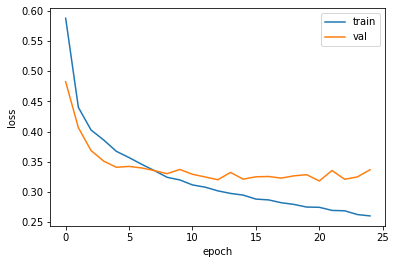

In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history= model.fit(train_scaled, train_target, epochs=25, verbose=0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [61]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history= model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

In [62]:
model.save_weights('model-weights.h5')

In [63]:
model.save('model-whole.h5')

In [64]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Oct 26 13:28 model-weights.h5
-rw-r--r-- 1 root root 981736 Oct 26 13:29 model-whole.h5


In [66]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [67]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

0.8819166666666667


In [118]:
a=np.array([[3,6,5],[1,5,2]])

print("Array:")
print(a)

req_index=np.argmax(a, axis=-1)
print("\nIndex with the largest value:")
print(req_index)

print("\nThe largest value in the array:")
print(a[req_index])

Array:
[[3 6 5]
 [1 5 2]]

Index with the largest value:
[1 1]

The largest value in the array:
[[1 5 2]
 [1 5 2]]


In [119]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3317 - accuracy: 0.8819


[0.33166345953941345, 0.8819166421890259]

In [121]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb])

In [122]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3180 - accuracy: 0.8857


[0.3180461823940277, 0.8857499957084656]

In [124]:
model= model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [125]:
print(early_stopping_cb.stopped_epoch)

12


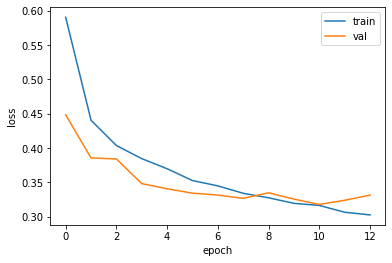

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [128]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8852


[0.3177127242088318, 0.8852499723434448]